![](http://images.plot.ly/logo/plotlyjs-logo@2x.png)

# Hands on with Plot.ly

> Plotly is the collaboration platform for modern data science.

## Plotly : Offline Use

**Notebook Mode** - Inside Jupyter/IPython Notebooks

In [1]:
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode() # run at the start of every notebook

/Users/alexj/anaconda3/envs/py27/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning:

Matplotlib is building the font cache using fc-list. This may take a moment.



In [2]:
iplot({
    "data": [{
        "x": [1, 2, 3],
        "y": [4, 2, 5]
    }],
    "layout": {
        "title": "hello world"
    }
})

In [3]:
import plotly.tools as tls
# Plotly can even stream 'live' data
tls.embed('streaming-demos','12')

## Basics

`plotly` charts are described _declaratively_ with objects in `plotly.graph_objs` and `dict`. Every aspect of a plotly chart (the colors, the grids, the data, and so on) has a corresponding key-value attribute in these objects. The [reference page](https://plot.ly/python/reference/) contains an extensive list of these attributes.

Plotly's graph description places attributes into two categories: **traces** (objects that describe a single series of data in a graph like Scatter or Heatmap) and **layout** attributes that apply to the rest of the chart, like the title, xaxis, or annotations).

Here is a simple example of a plotly chart inlined with links to each attribute's reference section.

In [7]:
from plotly.graph_objs import Scatter, Bar, Layout, Figure

data = [
    Scatter(                            # all "scatter" attributes: https://plot.ly/python/reference/#scatter
        x=[1, 2, 3],                    # more about "x":  /python/reference/#scatter-x
        y=[3, 1, 6],                    # more about "y":  /python/reference/#scatter-y
        mode="markers+lines",
        marker=dict(                    # marker is an dict, marker keys: /python/reference/#scatter-marker
            color="rgb(16, 32, 77)"     # more about marker's "color": /python/reference/#scatter-marker-color
        )
    ),
    Bar(                            # all "bar" chart attributes: /python/reference/#bar
        x=[1, 2, 3],                # more about "x": /python/reference/#bar-x
        y=[3, 1, 6],                # /python/reference/#bar-y
        name="bar chart example"    # /python/reference/#bar-name
    )
]

layout = Layout(                # all "layout" attributes: /python/reference/#layout
    title="simple example",     # more about "layout's" "title": /python/reference/#layout-title
    xaxis=dict(                 # all "layout's" "xaxis" attributes: /python/reference/#layout-xaxis
        title="time"            # more about "layout's" "xaxis's" "title": /python/reference/#layout-xaxis-title
    ),
    annotations=[
        dict(                            # all "annotation" attributes: /python/reference/#layout-annotations
            text="simple annotation",    # /python/reference/#layout-annotations-text
            x=0,                         # /python/reference/#layout-annotations-x
            xref="paper",                # /python/reference/#layout-annotations-xref
            y=0,                         # /python/reference/#layout-annotations-y
            yref="paper"                 # /python/reference/#layout-annotations-yref
        )
    ]
)

figure = Figure(data=data, layout=layout)

iplot(figure)

The full set of [Plotly Tutorials](https://plot.ly/python/) give you a great idea of what's possible _and_ on how you might implment them with python.

## Cheatsheet

In [4]:
from IPython.display import IFrame
IFrame('https://images.plot.ly/plotly-documentation/images/python_cheat_sheet.pdf',986,600)

## Chart Types

### Basic Charts

In [8]:
data = [
    Scatter(
        x=['2013-10-04 22:23:00', '2013-11-04 22:23:00', '2013-12-04 22:23:00'],
        y=[1, 3, 6]
    )
]
plot_url = iplot(data)

In [9]:
trace1 = Bar(
    x=[1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012],
    y=[219, 146, 112, 127, 124, 180, 236, 207, 236, 263, 350, 430, 474, 526, 488, 537, 500, 439],
    name='Rest of world',
    marker=dict(
        color='rgb(55, 83, 109)'
    )
)
trace2 = Bar(
    x=[1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012],
    y=[16, 13, 10, 11, 28, 37, 43, 55, 56, 88, 105, 156, 270, 299, 340, 403, 549, 499],
    name='China',
    marker=dict(
        color='rgb(26, 118, 255)'
    )
)
data = [trace1, trace2]

layout = Layout(
    title='US Export of Plastic Scrap',
    xaxis=dict(
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='USD (millions)',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)

fig = Figure(data=data, layout=layout)
plot_url = iplot(fig)

### Statistical Charts

In [10]:
import numpy as np

# Add histogram data
x1 = np.random.randn(200)-2
x2 = np.random.randn(200)
x3 = np.random.randn(200)+2
x4 = np.random.randn(200)+4

# Group data together
hist_data = [x1, x2, x3, x4]

group_labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4']

In [11]:
# Create distplot with custom bin_size
fig = tls.FigureFactory.create_distplot(hist_data, group_labels, bin_size=.2)

# Plot!
iplot(fig)

In [12]:
import pandas as pd

df2 = pd.DataFrame(np.random.randn(10, 4),
                         columns=['Facebook', 'Twitter', 'Instagram', 'Snapchat'])

df2['Contents'] = pd.Series(['apple', 'apple', 'grape', 'apple', 'apple', 'grape', 'pear', 'pear', 'apple', 'pear'])


fig = tls.FigureFactory.create_scatterplotmatrix(df2, diag='box', index='Contents',
                                  height=800, width=800)
iplot(fig)

In [13]:
df3 = pd.DataFrame(np.random.randn(20, 4),
                         columns=['Column A', 'Column B', 'Column C', 'Column D'])

df3['Contents'] = pd.Series(['apple', 'apple', 'grape', 'apple', 'apple',
                                'grape', 'pear', 'pear', 'apple', 'pear',
                                'apple', 'apple', 'grape', 'apple', 'apple',
                                'grape', 'pear', 'pear', 'apple', 'pear'])


fig = tls.FigureFactory.create_scatterplotmatrix(df3, diag='histogram', index='Contents',
                                  height=800, width=800)
iplot(fig)

In [14]:
df4 = pd.DataFrame(np.random.randn(100, 3),
                   columns=['Column A', 'Column B', 'Column C'])

fig = tls.FigureFactory.create_scatterplotmatrix(df4, diag='box', index='Column A',
                                  endpts=[-1, 0, 1],
                                  height=800, width=800, size=12,
                                  marker=dict(symbol=25))

iplot(fig)


### Maps

In [15]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

In [16]:
df.head(10)

COUNTRY  GDP (BILLIONS) CODE
0          Afghanistan           21.71  AFG
1              Albania           13.40  ALB
2              Algeria          227.80  DZA
3       American Samoa            0.75  ASM
4              Andorra            4.80  AND
5               Angola          131.40  AGO
6             Anguilla            0.18  AIA
7  Antigua and Barbuda            1.24  ATG
8            Argentina          536.20  ARG
9              Armenia           10.88  ARM

In [17]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

data = [ dict(
        type = 'choropleth',
        locations = df['CODE'],
        z = df['GDP (BILLIONS)'],
        text = df['COUNTRY'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            )
        ),
        colorbar = dict(
            tickprefix = '$',
            title = 'GDP<br>Billions US$'
        ),
    ) ]

layout = dict(
    title = '2014 Global GDP<br>Source: \
    <a href="https://www.cia.gov/library/publications/the-world-factbook/fields/2195.html"> CIA World Factbook</a>',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict(data=data, layout=layout)
iplot(fig)

### 3D Charts

In [18]:
from plotly.graph_objs import Scatter3d

# Get Data: this ex will only use part of it (i.e. rows 750-1500)
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv')

trace1 = Scatter3d(
    x=df['year'][750:1500],
    y=df['continent'][750:1500],
    z=df['pop'][750:1500],
    text=df['country'][750:1500],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        sizeref=750,
        size=df['gdpPercap'][750:1500],
        color = df['lifeExp'][750:1500],
        colorscale = 'Viridis',
        colorbar = dict(title = 'Life<br>Expectancy'),
        line=dict(color='rgb(140, 140, 170)')
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='Examining Population and Life Expectancy Over Time')
fig=dict(data=data, layout=layout)
iplot(fig)


## Cufflinks

In [19]:
tls.embed('https://plot.ly/~cufflinks/8')

In [20]:
import cufflinks as cf

# Go offline
cf.go_offline()

print cf.__version__

0.8.2


In [21]:
df = cf.datagen.lines(10,10)

In [22]:
df = cf.datagen.lines()
df.head()

QXU.MC    VOH.CK    JKP.IK    SSZ.VZ    CIB.TX
2015-01-01 -1.161528 -0.551159  0.364758  1.324656 -1.256154
2015-01-02 -1.190451 -0.260902  0.475151  2.365053 -0.993058
2015-01-03 -2.590265 -0.838862 -0.028444  1.761545 -1.938842
2015-01-04 -3.206082 -1.894279  0.881437  1.459945 -1.675732
2015-01-05 -2.114247 -2.954220  0.147687 -0.016525 -0.922434

In [23]:
iplot([{
    'x': df.index,
    'y': df[col],
    'name': col
}  for col in df.columns])

But with cufflinks, you can plot them directly

In [24]:
df

QXU.MC    VOH.CK     JKP.IK     SSZ.VZ    CIB.TX
2015-01-01 -1.161528 -0.551159   0.364758   1.324656 -1.256154
2015-01-02 -1.190451 -0.260902   0.475151   2.365053 -0.993058
2015-01-03 -2.590265 -0.838862  -0.028444   1.761545 -1.938842
2015-01-04 -3.206082 -1.894279   0.881437   1.459945 -1.675732
2015-01-05 -2.114247 -2.954220   0.147687  -0.016525 -0.922434
2015-01-06 -1.981551 -3.941778   0.791572   0.988642 -0.823751
2015-01-07 -3.781658 -3.412341   0.751853   0.832028  0.109957
2015-01-08 -3.797071 -2.694388   0.256904   0.090317 -0.782012
2015-01-09 -4.906989 -1.578805   0.031460   0.270312 -0.714764
2015-01-10 -5.734723 -0.444515  -0.262806   0.892874 -1.313233
2015-01-11 -6.316732  0.020603  -0.876109   0.219418 -1.391936
2015-01-12 -5.758057  1.062445  -2.366213   2.787070 -0.800698
2015-01-13 -7.013834  0.267757  -2.621080   3.610221 -0.534053
2015-01-14 -6.755719  0.609770  -1.523516   4.376867 -0.266801
2015-01-15 -7.750643  0.474199  -1.281184   6.299623  0.271999
2015-01-16 -6.587347 -0.327979  -2.311444   6.990164 -0.676461
2015-01-17 -5.807956 -0.600164  -1.228679   7.572468 -1.105483
2015-01-18 -4.622560 -0.111868   0.718550   7.691630 -1.545447
2015-01-19 -4.369160  0.046696   1.357077   9.388368 -2.516308
2015-01-20 -4.232243  0.916167   1.938934   9.366374 -0.830512
2015-01-21 -4.373163  1.117829   1.227142  10.048149 -0.665139
2015-01-22 -3.151767  2.027481   0.824477   9.711259 -0.963621
2015-01-23 -2.898496  3.283543   1.639210  10.290426  0.816250
2015-01-24 -1.428902  3.372832   0.634181  10.853029 -0.287532
2015-01-25 -0.235029  1.234206   0.987050  11.838554 -1.321742
2015-01-26 -1.423990  1.264645   0.325341  13.069934 -2.269446
2015-01-27  0.973690  1.042188  -0.027270  13.458417 -3.053896
2015-01-28  0.921134 -0.809963  -0.980242  11.920648 -3.720292
2015-01-29 -0.132845 -0.588894  -0.953869  12.066880 -5.419042
2015-01-30 -0.520840 -0.622445  -2.220269  11.651772 -4.442154
...              ...       ...        ...        ...       ...
2015-03-12  2.237623  2.599721   5.346968  11.113266  0.039967
2015-03-13  2.323683  2.814047   6.079189  12.299227 -0.424437
2015-03-14  3.683434  2.540188   6.001313  12.295440  0.076040
2015-03-15  2.354672  2.086972   7.448871  13.054354 -1.456777
2015-03-16  3.349525  2.342424   9.001830  13.702382 -3.216812
2015-03-17  2.508844  4.908118  10.937070  13.636094 -2.469415
2015-03-18  1.158573  5.670976  10.191817  12.610927 -2.441591
2015-03-19  1.208722  5.288268  10.931457  12.244974 -2.304508
2015-03-20  0.661443  6.415873  11.670195  12.254515 -4.034536
2015-03-21  0.935513  5.210418  13.336699  12.931180 -3.990113
2015-03-22  0.566085  3.944871  12.446557  12.142532 -3.273895
2015-03-23  0.083945  6.120477  11.859551  13.961267 -3.121790
2015-03-24  0.180610  6.254675  12.228905  13.279364 -4.167956
2015-03-25  1.955241  4.908733  11.664555  13.909631 -4.902460
2015-03-26  3.270756  6.019269  10.914343  14.150001 -3.959065
2015-03-27  4.583339  6.683991  11.437154  14.204684 -2.699042
2015-03-28  5.239466  4.874366  12.237554  14.829109 -2.394640
2015-03-29  4.792869  2.920470  11.316529  14.469564 -1.429244
2015-03-30  6.036522  1.604302  11.263764  15.296650 -1.053641
2015-03-31  5.403869  1.602520  11.765470  15.646877 -1.763116
2015-04-01  6.424191  4.128627  11.220186  15.069841 -1.558573
2015-04-02  6.811958  6.501201  11.408451  14.710345 -2.093571
2015-04-03  7.786189  5.939104  13.317700  15.782365 -1.259244
2015-04-04  7.998365  5.971886  12.928302  15.834066 -2.533536
2015-04-05  7.338192  6.004082  12.626930  16.232139 -1.700361
2015-04-06  7.584410  5.125040  12.464788  16.026606 -1.511514
2015-04-07  9.898787  4.833739  12.471639  16.471599 -2.376361
2015-04-08  8.387437  4.450306  11.500074  16.115872 -1.919212
2015-04-09  8.429865  2.879445  11.160151  14.124149 -2.617358
2015-04-10  7.385837  2.965772  10.743554  13.985849 -2.485742

[100 rows x 5 columns]

In [25]:
df.iplot(kind='scatter')

In [26]:
df = pd.DataFrame(np.random.randn(1000, 4), columns=['a b c d'.split()])
df.scatter_matrix()

In [27]:
cf.datagen.box(20).iplot(kind='box', legend=False, dimensions=(980,520))

In [26]:
# You can go back online of course :
cf.go_online() # switch back to online mode, where graphs are saved on your online plotly account

By default, plotly graphs are public. Make them private by setting world_readable to False

In [27]:
# But you need a paid account to make this work for more than one chart - that's why offline mode is pretty essential :)
cf.go_offline()
df.a.iplot(kind='histogram', world_readable=False)

### Chart Types

best to first skim through the docs, or at least know where to find it! ;)

In [28]:
help(cf.plotlytools._iplot)

Help on function _iplot in module cufflinks.plotlytools:

_iplot(self, data=None, layout=None, filename='', sharing=None, kind='scatter', title='', xTitle='', yTitle='', zTitle='', theme=None, colors=None, colorscale=None, fill=False, width=None, dash='solid', mode='lines', symbol='dot', size=12, barmode='', sortbars=False, bargap=None, bargroupgap=None, bins=None, histnorm='', histfunc='count', orientation='v', boxpoints=False, annotations=None, keys=False, bestfit=False, bestfit_colors=None, mean=False, mean_colors=None, categories='', x='', y='', z='', text='', gridcolor=None, zerolinecolor=None, margin=None, labels=None, values=None, secondary_y='', subplots=False, shape=None, error_x=None, error_y=None, error_type='data', locations=None, lon=None, lat=None, asFrame=False, asDates=False, asFigure=False, asImage=False, dimensions=None, asPlot=False, asUrl=False, online=None, **kwargs)
           Returns a plotly chart either as inline chart, image of Figure object
    
           Pa

Set your global settings - only need this once.

In [28]:
try:
    cf.set_config_file(
        theme='polar',
        sharing='secret',
        offline=True,
        offline_show_link=False,
        datagen_mode='stocks',
        dimensions=(980,720)
    )
except Exception as e:
    if "Invalid keyword : 'dimensions'" == str(e):
        print """Whoops! We're trying to use some unreleased functionality -
        it'll be made available to us before long. Just keep an eye
        on the cufflinks releases to see if there's a new version out."""
        print '\n For now just add   dimensions=(980,800)   as an argument to iplot()'
        print '\n See : https://github.com/santosjorge/cufflinks#release-notes '
    

#### Line Charts

In [29]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=['A', 'B']).cumsum()
df.iplot(dimensions=(980,720))

In [30]:
# Plot one column vs another with x and y keywords
df.iplot(x='A', y='B', dimensions=(980,720))

In [32]:
%%sh
gpip install pandas_datareader

sh: line 1: gpip: command not found


In [33]:
from pandas_datareader.data import DataReader as get_stocks
from datetime import datetime

start = datetime(2016, 1, 1)
end = datetime.now()

df_ibm = get_stocks("IBM", 'yahoo', start, end)
df_appl = get_stocks("AAPL", 'yahoo', start, end)
df_msft = get_stocks("MSFT", 'yahoo', start, end)


df = pd.DataFrame({'IBM': df_ibm.Open, 'Apple': df_appl.Open, 'Microsoft': df_msft.Open})
df.head()

ImportError: No module named pandas_datareader.data

In [34]:
df.iplot(kind='line', fill=True, yTitle='Open Price', title='Tech Giants in 2016')

#### Bar Charts

In [35]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/widgets/master/ipython-examples/311_150k.csv', parse_dates=True, index_col=1, low_memory=False)
df.head(3)

Unique Key             Closed Date Agency  \
Created Date                                                     
2014-11-16 23:46:00    29300358  11/16/2014 11:46:00 PM   DSNY   
2014-11-16 02:24:35    29299837  11/16/2014 02:24:35 AM    DOB   
2014-11-16 02:17:12    29297857  11/16/2014 02:50:48 AM   NYPD   

                                         Agency Name     Complaint Type  \
Created Date                                                              
2014-11-16 23:46:00                BCC - Queens East  Derelict Vehicles   
2014-11-16 02:24:35          Department of Buildings       Building/Use   
2014-11-16 02:17:12  New York City Police Department    Illegal Parking   

                                                           Descriptor  \
Created Date                                                            
2014-11-16 23:46:00                              14 Derelict Vehicles   
2014-11-16 02:24:35  Illegal Conversion Of Residential Building/Space   
2014-11-16 02:17:12                                  Blocked Sidewalk   

                       Location Type Incident Zip         Incident Address  \
Created Date                                                                 
2014-11-16 23:46:00           Street        11432  80-25 PARSONS BOULEVARD   
2014-11-16 02:24:35              NaN        10465    938 HUNTINGTON AVENUE   
2014-11-16 02:17:12  Street/Sidewalk        11201      229 DUFFIELD STREET   

                           Street Name  \
Created Date                             
2014-11-16 23:46:00  PARSONS BOULEVARD   
2014-11-16 02:24:35  HUNTINGTON AVENUE   
2014-11-16 02:17:12    DUFFIELD STREET   

                                       ...                     \
Created Date                           ...                      
2014-11-16 23:46:00                    ...                      
2014-11-16 02:24:35                    ...                      
2014-11-16 02:17:12                    ...                      

                    Bridge Highway Name Bridge Highway Direction Road Ramp  \
Created Date                                                                 
2014-11-16 23:46:00                 NaN                      NaN       NaN   
2014-11-16 02:24:35                 NaN                      NaN       NaN   
2014-11-16 02:17:12                 NaN                      NaN       NaN   

                    Bridge Highway Segment Garage Lot Name Ferry Direction  \
Created Date                                                                 
2014-11-16 23:46:00                    NaN             NaN             NaN   
2014-11-16 02:24:35                    NaN             NaN             NaN   
2014-11-16 02:17:12                    NaN             NaN             NaN   

                    Ferry Terminal Name   Latitude  Longitude  \
Created Date                                                    
2014-11-16 23:46:00                 NaN  40.719411 -73.808882   
2014-11-16 02:24:35                 NaN  40.827862 -73.830641   
2014-11-16 02:17:12                 NaN  40.691248 -73.984375   

                                                     Location  
Created Date                                                   
2014-11-16 23:46:00  (40.719410639341916, -73.80888158860446)  
2014-11-16 02:24:35  (40.827862046105416, -73.83064067165407)  
2014-11-16 02:17:12   (40.69124772858873, -73.98437529459297)  

[3 rows x 51 columns]

In [36]:
series = df['Complaint Type'].value_counts()[:20]
series.head(3)

HEAT/HOT WATER            32202
Street Light Condition     7558
Blocked Driveway           6997
Name: Complaint Type, dtype: int64

In [37]:
# Plot a series directly
series.iplot(kind='bar', yTitle='Number of Complaints', title='NYC 311 Complaints')

In [38]:
# Plot a dataframe row as a bar
df = pd.DataFrame(np.random.rand(10, 4), columns=['A', 'B', 'C', 'D'])
row = df.ix[5]
row.iplot(kind='bar')

In [39]:
# Call iplot(kind='bar') on a dataframe to produce a grouped bar chart
df.iplot(kind='bar')

In [40]:
df.iplot(kind='bar', barmode='stack')

In [41]:
# Make your bar charts horizontal with kind='barh'
df.iplot(kind='barh',barmode='stack', bargap=.1)

### Themes for Cufflinks

In [42]:
cf.getThemes()

['polar', 'space', 'ggplot', 'pearl', 'solar', 'white', 'henanigans']

In [43]:
cf.set_config_file(theme='white')

Try re-running some of the previous graphs!,

In [44]:
df = pd.DataFrame({'a': np.random.randn(1000) + 1,
                   'b': np.random.randn(1000),
                   'c': np.random.randn(1000) - 1})
df.head(2)

a         b         c
0 -0.509881 -0.922524 -1.398153
1  2.379139 -0.137128  0.141311

In [45]:
df.iplot(kind='histogram')

#### Customise your historgrams

```
barmode (overlay | group | stack)
bins (int)
histnorm ('' | 'percent' | 'probability' | 'density' | 'probability density')
histfunc ('count' | 'sum' | 'avg' | 'min' | 'max')
```

In [46]:
df.iplot(kind='histogram',
         barmode='stack',
         bins=100,
         histnorm='percent',
         histfunc='count',
         dimensions=(980,720)
    )

In [47]:
# Like every chart type, split your traces into subplots or small-multiples with subplots and optionally shape. More on subplots below.

In [48]:
df.iplot(kind='histogram', subplots=True, shape=(1, 3))

In [49]:
df.iplot(kind='histogram', subplots=True, shape=(3, 1))

### Box Plots

In [34]:
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
df.iplot(kind='box', dimensions=(980,720))

### AREA CHARTS

To produce stacked area plot, each column must be either all positive or all negative values.

When input data contains NaN, it will be automatically filled by 0. If you want to drop or fill by different values, use dataframe.dropna() or dataframe.fillna() before calling plot.

In [51]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

In [52]:
df.iplot(kind='area', fill=True, dimensions=(980,720))

In [53]:
df.iplot(fill=True)

### Scatter Plot

Set `x` and `y` as column names. If `x` isn't supplied, `df.index` will be used.

In [54]:
from IPython.display import YouTubeVideo

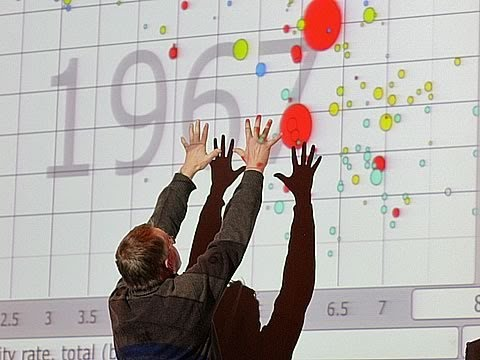

In [55]:
YouTubeVideo('usdJgEwMinM', 980,720)

In [56]:
df = pd.read_csv('http://www.stat.ubc.ca/~jenny/notOcto/STAT545A/examples/gapminder/data/gapminderDataFiveYear.txt', sep='\t')
df2007 = df[df.year==2007]
df1952 = df[df.year==1952]
df.head(2)

country  year        pop continent  lifeExp   gdpPercap
0  Afghanistan  1952  8425333.0      Asia   28.801  779.445314
1  Afghanistan  1957  9240934.0      Asia   30.332  820.853030

In [57]:
df2007.iplot(kind='scatter', mode='markers', x='gdpPercap', y='lifeExp')

It's not possible just yet to add multiple traces to a scatter plot with cufflinks.... so we have to drop down to plotly.

In [58]:
fig = {
    'data': [
        {'x': df2007.gdpPercap, 'y': df2007.lifeExp, 'text': df2007.country, 'mode': 'markers', 'name': '2007'},
        {'x': df1952.gdpPercap, 'y': df1952.lifeExp, 'text': df1952.country, 'mode': 'markers', 'name': '1952'}
    ],
    'layout': {
        'xaxis': {'title': 'GDP per Capita', 'type': 'log'},
        'yaxis': {'title': "Life Expectancy"}
    }
}
iplot(fig)

In the full dataset, you can look through your year values and use them like this:

In [59]:
iplot(
    {
        'data': [
            {
                'x': df[df['year']==year]['gdpPercap'],
                'y': df[df['year']==year]['lifeExp'],
                'name': year, 'mode': 'markers',
            } for year in [1952, 1982, 2007]
        ],
        'layout': {
            'xaxis': {'title': 'GDP per Capita', 'type': 'log'},
            'yaxis': {'title': "Life Expectancy"}
        }
})

### Bubble Charts

Add `size` to create a bubble chart. Add hover text with the text attribute.

In [60]:
df2007.iplot(kind='bubble', x='gdpPercap', y='lifeExp', size='pop', text='country',
             xTitle='GDP per Capita', yTitle='Life Expectancy')

### Subplots

`subplots=True` partitions columns into separate subplots. Specify rows and columns with `shape=(rows, cols)` and share axes with `shared_xaxes=True` and `shared_yaxes=True`.

In [61]:
df=cf.datagen.lines(4)
df.iplot(subplots=True, shape=(4,1), shared_xaxes=True, fill=True)

Add subplot titles with `subplot_titles` as a list of titles or `True` to use column names.

In [62]:
df.iplot(subplots=True, subplot_titles=True, legend=False)

### Scatter Matrix

In [63]:
df.scatter_matrix()

### Heatmaps

In [64]:
cf.datagen.heatmap(20,20).iplot(kind='heatmap',colorscale='spectral')

### Lines & Shapes

Use `hline` and `vline` for horizontal and vertical lines.

In [65]:
df=cf.datagen.lines(3,columns=['a','b','c'])

In [66]:
df.iplot(hline=[2,4],vline=['2015-02-10'])

Draw shaded regions with `hspan`

In [67]:
df.iplot(hspan=[(-1,1),(2,5)])

Extra parameters can be passed in the form of dictionaries, width, fill, color, fillcolor, opacity

In [68]:
df.iplot(vspan={'x0':'2015-02-15','x1':'2015-03-15','color':'rgba(30,30,30,0.3)','fill':True,'opacity':.4})

## Customising Figures

`cufflinks` is designed for simple one-line charting with Pandas and Plotly. All of the Plotly chart attributes are not directly assignable in the `df.iplot` call signature.

To update attributes of a cufflinks chart that aren't available, first convert it to a figure `(asFigure=True)`, then tweak it, then plot it with `plotly.plotly.iplot`.

`cufflinks` generates these figure's that describe plotly graphs. For example, this graph:


In [69]:
df.iplot(kind='scatter')

has this description:

In [70]:
figure = df.iplot(kind='scatter', asFigure=True)
print figure.to_string()
# Or cf.pp(figure['layout'])

Figure(
    data=Data([
        Scatter(
            x=['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04', '..'  ],
            y=array([  1.09724559e+00,   2.86393039e-03,  -2.83770550e+00,
 ..,
            line=Line(
                color='rgba(255, 153, 51, 1.0)',
                dash='solid',
                width=1.3
            ),
            mode='lines',
            name='a',
            text=''
        ),
        Scatter(
            x=['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04', '..'  ],
            y=array([ 1.44058472,  2.34647948,  0.02452979, -1.72721852, -1...,
            line=Line(
                color='rgba(55, 128, 191, 1.0)',
                dash='solid',
                width=1.3
            ),
            mode='lines',
            name='b',
            text=''
        ),
        Scatter(
            x=['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04', '..'  ],
            y=array([  9.07888067e-01,   2.15669931e+00,   7.05442055e-01,
 ..,
 

So, if you want to edit any attribute of a Plotly graph from cufflinks, first convert it to a figure and then edit the figure objects. Let's add a yaxis title, tick suffixes, and new legend names to this example:

In [71]:
figure['layout']['yaxis1'].update({'title': 'Price', 'tickprefix': '$'})
for i, trace in enumerate(figure['data']):
    trace['name'] = 'Trace {}'.format(i)
    
iplot(figure)

## MatplotLib & Plotly

In [72]:
# See : https://plot.ly/python/ipython-notebook-tutorial/#III.-Plotting

## IPython Widgets

[IPython widgets](http://moderndata.plot.ly/widgets-in-ipython-notebook-and-plotly/) allow you to add sliders, widgets, search boxes, and more to your Notebook. See the [widget docs]() for more information. For others to be able to access your work, they'll need IPython. Or, you can use a cloud-based NB option so others can run your work. 

In [73]:
from IPython.display import Image

In [74]:
Image(url='http://i.imgur.com/l9Yzfcs.gif')
# http://nbviewer.jupyter.org/gist/chriddyp/9827cb5086cfab8da092/Widgets%20-%20Fractal%20Tree%20Generator.ipynb

In [75]:
Image(url='http://i.imgur.com/2Wbbo6l.gif')
# http://nbviewer.jupyter.org/gist/chriddyp/9827cb5086cfab8da092/Widgets%20-%20Contour%20Plotter.ipynb

In [76]:
Image(url='http://i.imgur.com/CzMRuMo.gif')
# http://nbviewer.jupyter.org/gist/jackparmer/4b9c3142a31e5c12988d

In [77]:
Image(url='http://i.imgur.com/ptVBU5m.gif')
# http://nbviewer.jupyter.org/gist/jackparmer/7d948acf4bc96a2b903e?flush_cache=true

In [78]:
Image(url='http://i.imgur.com/OUVRQ1u.gif')
# https://plot.ly/pandas/ipython-widgets/
# http://nbviewer.jupyter.org/gist/chriddyp/9827cb5086cfab8da092/Pandas%20Widget%20-%20Time%20Series,%20Search,%20and%20Filtering.ipynb

In [79]:
# http://nbviewer.jupyter.org/gist/jackparmer/7d948acf4bc96a2b903e?flush_cache=true

To learn more about using plotly from python, head over to:
    
<h1 style="text-align:center
    "><a href="https://plot.ly/python/">Plotly for Python</a></h1>